# Networks and enrichment

---
## Before Class
1. Review slides on GSEA

---
## Learning Objectives
1. Gene Ontology and Pathways
* Gene set enrichment analysis


---
## Pathway enrichment analysis

Often we identify large sets of features (for example, proteins, metabolites, transcribed genes, open chromatin regions, etc) and we would like to identfy if there is any enrichment with known pathways for these data. A common way of doing this is through enrichment analysis. Today we will be using a common enrichment analysis tool called GSEA (Gene Set Enrichment Analysis). The ultimate goal of this method is to identify if there is any enrichment of specific sets of genes given our features.

```
GSEA:
    Rank genes by expression
    Compute cumulative sum over ranked genes as:
        +1/(gene set size) when gene is in set
        -1/(remaining genes) otherwise
    Enrichment = maximum deviation from zero
    
```



In [40]:
def read_gene_sets(filename):
    """ Function to read in gene set file
    
    Args:
        filename (str): file to be read
        
    Returns:
        gene_sets (dict of lists): dictionary with keys of gene set names and values containing list of gene names
    
    Example:
    >>> gene_sets = read_gene_sets("data/temp.gmt")
    >>> gene_sets['demo1']  #doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    ['ATXN1', 'UBQLN4', 'CALM1', 'DLG4', 'MRE11A', 'CTNNB1', 'YWHAG', ...]
    """    
    
#     #first need to initialize an empty dictionary 
#     #will be returned 
#     #empty dictionary 
#     gene_sets = {}
#     #now need to open the file 
#     opened_file = open(filename, "rt") 
    
#     for line in opened_file:
#         info = line.strip().split("\t") 
#         #name of the gene set and a longer name. We don't want the longer name 
#         gene_sets[info[0]] = info[2:]
        
#     return gene_sets

    gene_sets = {}
    file_object = open(filename, 'rt')
    
    for line in file_object:
        values = line.strip().split("\t")
        gene_sets[values[0]] = values[2:]

    return gene_sets
        
    
def read_expression(filename):
    """ Function to read in expression file
    
    Args:
        filename (str): file to be read
        
    Returns:
        expression (dict): dictionary with keys of gene set names and values of expression

    Example:
    >>> expression = read_expression("data/temp.txt")
    >>> expression  #doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    {'ATXN1': 16.4567529278529, 'UBQLN4': 13.9894927152905, 'CALM1': 13.7455333730743, ...}
    """  
    
#     expression = {}
#     opened_file = open(filename, "rt") 
    
#     for line in opened_file:
#         info = line.strip().split("\t") 
#         expression[info[0]] = float(info[1]) #python thinks it's a string so convert to a float 
        
#     return expression 
    expression = {}
    file_object = open(filename, 'rt')
    
    for line in file_object:
        values = line.strip().split("\t")
        expression[values[0]] = float(values[1])

    return expression
    

In [41]:
#Read in our data
gene_sets = read_gene_sets("data/temp.gmt")
expression = read_expression("data/temp.txt")

In [42]:
def GSEA(gene_set, expression):
    """ Function to perform GSEA testing on a gene set and expression data set
    
    Args:
        gene_set (list): list of gene names in a gene set
        expression (dict): dictionary with keys of gene set names and values of expression
        
    Returns:
        enrichment (float): enrichment score for a given gene set
        score (list): list of scores as sorted genes are compared to gene set
        
    Example:
    >>> gene_sets = read_gene_sets("data/temp.gmt")
    >>> expression = read_expression("data/temp.txt")
    >>> GSEA(gene_sets['demo1'], expression)  #doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    (1.0000000000000004, [0, 0.022222222222222223, 0.044444444444444446, 0.06666666666666667, ...)
    """  

    
#     GSEA:
#     Rank genes by expression
#     Compute cumulative sum over ranked genes as:
#         +1/(gene set size) when gene is in set
#         -1/(remaining genes) otherwise
#     Enrichment = maximum deviation from zero

#     hit_score = 1/len(gene_set) 
#     miss_score = -1/(len(expression) - len(gene_set))
#     score = [0] # a list that starts with 0, because that is the score we'll begin with 
#     enrichment = 0 
    
#     #rank genes by expression 
#     #will need the sorted function in python
#     #we're sorting by expression (the key)
#     #we want sorting to be descending 
#     sorted_expression = sorted(expression, key=expression.get, reverse = True) 
    
#     for i, gene in enumerate(sorted_expression):
#         if gene in gene_set:
#             #when gene is in the sett, then we'll have a higher score 
#             new_score = score[i] + hit_score  #need to add the previous score 
#         else:
#             #when the gene is not in the gen_set then we'll have 
#             new_score = score[i] + miss_score 
#         score.append(new_score) 
        
#         if new_score > enrichment:
#             enrichment = new_score 

#     return score, enrichment 

    hit_score = 1/len(gene_set)
    miss_score = -1/(len(expression)-len(gene_set))
    print(hit_score, miss_score)
    score = [0]
    enrichment = 0

    sorted_expression = sorted(expression, key=expression.get, reverse=True)

    for i, gene in enumerate(sorted_expression):
        if gene in gene_set:
            new_score = score[i] + hit_score
        else:
            new_score = score[i] + miss_score

        score.append(new_score)
        if new_score > enrichment:
            enrichment = new_score
    
    return enrichment, score
                    

In [43]:
gene_sets = read_gene_sets("data/temp.gmt")
expression = read_expression("data/temp.txt")
enrichment, score = GSEA(gene_sets['demo4'], expression)
print(enrichment)
#sorting the list and keep track, and if you hit or not the score goes up or down. 

0.011235955056179775 -4.379625979941313e-05
0.4320122117751872


## Plotting GSEA

Next, we will plot the results of the GSEA analyses as below:

<img src="figures/gsea_plot.png">

In [46]:
def plot_GSEA(scores):
    """ Function to make GSEA plots
    
    Args:
        score (list): list of scores as sorted genes are compared to gene set
    """  
    
    plt.plot(scores)
    plt.show()


0.022222222222222223 -4.37120251781265e-05
demo1 1.0000000000000004


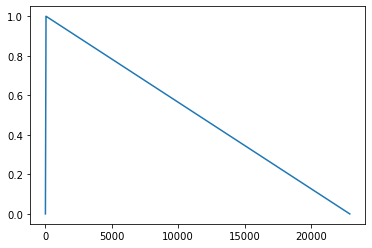

0.027777777777777776 -4.369483527047103e-05
demo2 0.6379276025129387


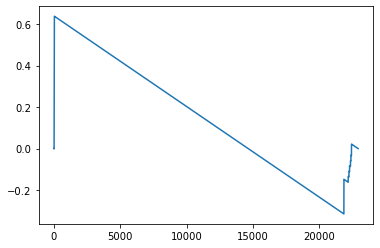

0.013513513513513514 -4.376750700280112e-05
demo3 0.45286712658036266


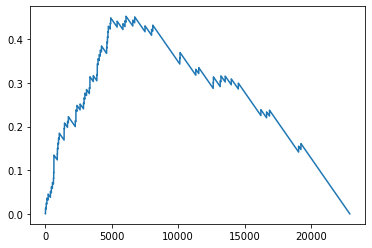

0.011235955056179775 -4.379625979941313e-05
demo4 0.4320122117751872


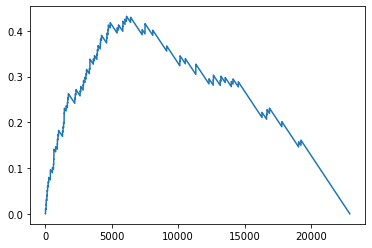

In [47]:
# Here we plot everything
%matplotlib inline
import matplotlib.pyplot as plt

for gene_set in gene_sets:
    enrichment, scores = GSEA(gene_sets[gene_set], expression)
    print(gene_set, enrichment)
    plot_GSEA(scores)

## Assessing significance

For GSEA and other similar models, it is often difficult to accurately model a background expectation. In these cases we can use simulations to estimate an empirical p-value:

```
for 1000 permutations:
    select random gene set of the same size as existing gene set
    calculate enrichment score for this gene set
    
p_val <= Number of permutations with a higher score / total number of permutations
```

In [50]:
import random

def permute_GSEA(enrichment, gene_set, expression, permutations=1000, seed=42):
    """ Function to perform GSEA testing on a gene set and expression data set
    
    Args:
        enrichment (float): enrichment of the gene set
        gene_set (list): list of gene names in a gene set
        expression (dict): dictionary with keys of gene set names and values of expression
        permutations (int): number of permutations
        seed (int): seed for random.sample
        
    Returns:
        p_val (float): empirical p-pvalue for enrichment
        
    Example:
    >>> gene_sets = read_gene_sets("data/temp.gmt")
    >>> expression = read_expression("data/temp.txt")
    >>> enrichment, scores = GSEA(gene_sets['demo1'], expression)
    >>> permute_GSEA(enrichment, gene_set, expression, permutations=10, seed=42) #doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    0.1
    """
    
    random.seed(seed) 
    enrichment_scores = []
    
    for i in range(permutations):
        random_gene_set = random.sample(list(expression.keys()), len(gene_set))
        random_enrichment, random_score = GSEA(random_gene_set, expression)
        
        enrichment_scores.append(random_enrichment) 
        
    #Check if random_enrichments are greater than real enrichment
    enrichment_counter = 1
    for value in enrichment_scores:
        if value > enrichment:
            enrichment_counter += 1 
        
    return enrichment_counter/permutations


In [51]:
enrichment, scores = GSEA(gene_sets['demo1'], expression)
permute_GSEA(enrichment, gene_set, expression, permutations=10, seed=42)

0.022222222222222223 -4.37120251781265e-05
0.2 -4.3635728934851856e-05
0.2 -4.3635728934851856e-05
0.2 -4.3635728934851856e-05
0.2 -4.3635728934851856e-05
0.2 -4.3635728934851856e-05
0.2 -4.3635728934851856e-05
0.2 -4.3635728934851856e-05
0.2 -4.3635728934851856e-05
0.2 -4.3635728934851856e-05
0.2 -4.3635728934851856e-05


0.1

In [52]:
import doctest
doctest.testmod()

**********************************************************************
File "__main__", line 15, in __main__.GSEA
Failed example:
    GSEA(gene_sets['demo1'], expression)  #doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
Expected:
    (1.0000000000000004, [0, 0.022222222222222223, 0.044444444444444446, 0.06666666666666667, ...)
Got:
    0.022222222222222223 -4.37120251781265e-05
    (1.0000000000000004, [0, 0.022222222222222223, 0.044444444444444446, 0.06666666666666667, 0.08888888888888889, 0.11111111111111112, 0.13333333333333333, 0.15555555555555556, 0.17777777777777778, 0.2, 0.22222222222222224, 0.24444444444444446, 0.26666666666666666, 0.28888888888888886, 0.31111111111111106, 0.33333333333333326, 0.35555555555555546, 0.37777777777777766, 0.39999999999999986, 0.42222222222222205, 0.44444444444444425, 0.46666666666666645, 0.48888888888888865, 0.5111111111111108, 0.5333333333333331, 0.5555555555555554, 0.5777777777777776, 0.5999999999999999, 0.6222222222222221, 0.6444444444444444, 0.666666

TestResults(failed=3, attempted=11)